In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import scipy
%matplotlib inline

In [2]:
# Load dataset
data_train = pd.read_csv('train.csv')

In [3]:
# In order to display all the columns:
pd.options.display.max_columns = 26

In [4]:
# Get first 10 lines data_train with full columns:
data_train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,1,trqRTJubX5scFsf,37bdc8299d3b42e6f04ccf4fca64bacc,null,mm_14539978_2071324_8355258,300,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,2,333a4ab5e4ae8e17d7ca86237721ba7a,4bf89e8bc0f9e55e8305087441b5276c,null,2932492844,728,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,4,1164f4caea2d39bc9dcc8dd22bb0e5c8,37a58da844768798ec368daff8a5e94b,null,9223372032560960619,960,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,2,trqRTv1EXQuYgMKE5SqW,da7852090bb61af96fbcd29898929149,null,3151450371,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,3,5F1RQS9rg5scFsf,19422c57c90579925952ed859eaf3f4d,null,News_F_bottom_Width,1000,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [5]:
# Whole avgCTR of data_train
data_train_impression = len(data_train)
data_train_click = data_train.click.sum()
avgCTR = data_train_click / data_train_impression
avgCTR

0.0007539649884458758

In [6]:
# Whole CPM of data_train
data_train_paysum = data_train.payprice.sum()
CPM = (data_train_paysum / data_train_impression * 1000)
CPM

80251.02474739948

In [7]:
# Whole eCPC of data_train
data_train_paysum = data_train.payprice.sum()
eCPC = data_train_paysum / data_train_click
eCPC

106438.66224188791

In [8]:
# Get some statistical features: average CTR, CPN, eCPC
# according to different advertiser data_train

dataset_status = pd.DataFrame()
dataset_status['advertiser'] = np.sort(data_train.advertiser.unique())
dataset_status['impression'] = data_train.groupby('advertiser').size().values
click = data_train.groupby('advertiser').click.value_counts()
dataset_status['click'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_status['CTR'] = (((dataset_status.click / dataset_status.impression) * 100).round(7)).astype(str) + '%'
dataset_status['cost'] = data_train.groupby('advertiser').payprice.sum().values
dataset_status['CPM'] = (((dataset_status.cost / dataset_status.impression) * 1000).round(2)).astype(str)
dataset_status['eCPC'] = ((dataset_status.cost / dataset_status.click).round(2)).astype(str)

dataset_status

,advertiser,impression,click,CTR,cost,CPM,eCPC
0,1458,540293,451,0.0834732%,37231239,68909.35,82552.64
1,2259,146778,45,0.0306585%,13649026,92990.95,303311.69
2,2261,120619,37,0.0306751%,10789152,89448.2,291598.7
3,2821,231416,144,0.0622256%,20625766,89128.52,143234.49
4,2997,54487,251,0.4606603%,3413227,62642.96,13598.51
5,3358,304782,233,0.0764481%,28145288,92345.64,120795.23
6,3386,498554,358,0.0718077%,38341028,76904.46,107097.84
7,3427,454031,340,0.0748848%,36820111,81096.03,108294.44
8,3476,346778,175,0.0504646%,27481402,79247.82,157036.58


In [9]:
# Get the average CTR of each advertiser out of the above table

dataset_status_t = array(dataset_status)

pCTR_advertiser_1458 = dataset_status_t[0,2] / dataset_status_t[0,1]
pCTR_advertiser_2259 = dataset_status_t[1,2] / dataset_status_t[1,1]
pCTR_advertiser_2261 = dataset_status_t[2,2] / dataset_status_t[2,1]
pCTR_advertiser_2821 = dataset_status_t[3,2] / dataset_status_t[3,1]
pCTR_advertiser_2997 = dataset_status_t[4,2] / dataset_status_t[4,1]
pCTR_advertiser_3358 = dataset_status_t[5,2] / dataset_status_t[5,1]
pCTR_advertiser_3386 = dataset_status_t[6,2] / dataset_status_t[6,1]
pCTR_advertiser_3427 = dataset_status_t[7,2] / dataset_status_t[7,1]
pCTR_advertiser_3476 = dataset_status_t[8,2] / dataset_status_t[8,1]

print ('pCTR_advertiser_1458:' + str(pCTR_advertiser_1458))
print ('pCTR_advertiser_2259:' + str(pCTR_advertiser_2259))
print ('pCTR_advertiser_2261:' + str(pCTR_advertiser_2261))
print ('pCTR_advertiser_2821:' + str(pCTR_advertiser_2821))
print ('pCTR_advertiser_2297:' + str(pCTR_advertiser_2997))
print ('pCTR_advertiser_3358:' + str(pCTR_advertiser_3358))
print ('pCTR_advertiser_3386:' + str(pCTR_advertiser_3386))
print ('pCTR_advertiser_3427:' + str(pCTR_advertiser_3427))
print ('pCTR_advertiser_3476:' + str(pCTR_advertiser_3476))

pCTR_advertiser_1458:0.0008347322656410503
pCTR_advertiser_2259:0.000306585455585987
pCTR_advertiser_2261:0.0003067510093766322
pCTR_advertiser_2821:0.000622256023784008
pCTR_advertiser_2297:0.004606603409987703
pCTR_advertiser_3358:0.0007644808420444777
pCTR_advertiser_3386:0.0007180766777520589
pCTR_advertiser_3427:0.0007488475456521691
pCTR_advertiser_3476:0.0005046456234247847


In [10]:
# Using 'weekday' to analyze the average CTR of each advertiser
# Giving three examples: advertiser_1458, advertiser_3358, advertiser_3386

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(data_train.weekday.unique())

click = data_train.groupby('weekday').click.value_counts()

impression_1458 = data_train.groupby('weekday').advertiser.value_counts()
daily_CTR['impression_1458'] = impression_1458.iloc[impression_1458.index.get_level_values('advertiser') == 1458].values 

impression_3358 = data_train.groupby('weekday').advertiser.value_counts()
daily_CTR['impression_3358'] = impression_3358.iloc[impression_3358.index.get_level_values('advertiser') == 3358].values

impression_3386 = data_train.groupby('weekday').advertiser.value_counts()
daily_CTR['impression_3386'] = impression_3386.iloc[impression_3386.index.get_level_values('advertiser') == 3386].values 

click = data_train.groupby(['advertiser','weekday']).click.value_counts()

clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['click_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['click_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
daily_CTR['click_3386'] = clickall_3386.iloc[clickall_3386.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.click_1458 / daily_CTR.impression_1458)).round(5)
daily_CTR['CTR_3358'] = ((daily_CTR.click_3358 / daily_CTR.impression_3358)).round(5)
daily_CTR['CTR_3386'] = ((daily_CTR.click_3386 / daily_CTR.impression_3386)).round(5)

daily_CTR

,day,impression_1458,impression_3358,impression_3386,click_1458,click_3358,click_3386,CTR_1458,CTR_3358,CTR_3386
0,0,83994,33238,77969,66,21,50,0.00079,0.00063,0.00064
1,1,72204,30707,67122,63,11,47,0.00087,0.00036,0.00070
2,2,73810,26206,68854,63,14,43,0.00085,0.00053,0.00062
3,3,76509,81073,67776,68,79,49,0.00089,0.00097,0.00072
4,4,76835,41414,71714,72,39,57,0.00094,0.00094,0.00079
5,5,78485,58888,68955,65,50,69,0.00083,0.00085,0.00100
6,6,78456,33256,76164,54,19,43,0.00069,0.00057,0.00056


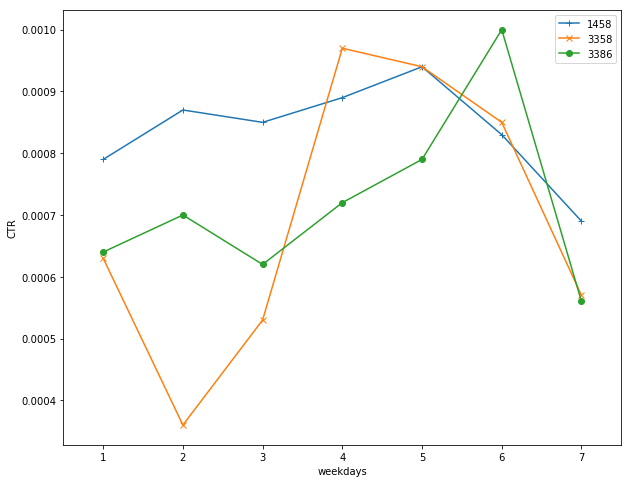

In [11]:
# Line plot of average CTR for advertiser 1458 & 3358 & 3386 in different 'weekday'

f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='x', label='3358')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3386.values,marker='o', label='3386')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [12]:
# Using 'hour' to analyze the average CTR of each advertiser
# Giving three examples: advertiser_1458, advertiser_3358, advertiser_3386

hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(data_train.hour.unique())

impression_1458 = data_train.groupby('hour').advertiser.value_counts()
hourly_CTR['impression_1458'] = impression_1458.iloc[impression_1458.index.get_level_values('advertiser') == 1458].values 

impression_3358 = data_train.groupby('hour').advertiser.value_counts()
hourly_CTR['impression_3358'] = impression_3358.iloc[impression_3358.index.get_level_values('advertiser') == 3358].values 

impression_3386 = data_train.groupby('hour').advertiser.value_counts()
hourly_CTR['impression_3386'] = impression_3386.iloc[impression_3386.index.get_level_values('advertiser') == 3386].values 

click = data_train.groupby(['advertiser','hour']).click.value_counts()

clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['click_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['click_3358'] = click3358

clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
click3386 = list(clickall_3386.iloc[clickall_3386.index.get_level_values('click') == 1].values)
click3386 = click3386[:4] + [0] + click3386[4:]
hourly_CTR['click_3386'] = click3386

hourly_CTR['CTR_1458'] = ((hourly_CTR.click_1458 / hourly_CTR.impression_1458)).round(5)
hourly_CTR['CTR_3358'] = ((hourly_CTR.click_3358 / hourly_CTR.impression_3358)).round(5)
hourly_CTR['CTR_3386'] = ((hourly_CTR.click_3386 / hourly_CTR.impression_3386)).round(5)


In [13]:
hourly_CTR

,hour,impression_1458,impression_3358,impression_3386,click_1458,click_3358,click_3386,CTR_1458,CTR_3358,CTR_3386
0,0,25499,72359,39215,23,70,34,0.00090,0.00097,0.00087
1,1,11251,7583,9409,8,8,4,0.00071,0.00105,0.00043
2,2,6811,3527,6214,14,2,4,0.00206,0.00057,0.00064
3,3,7189,1447,6237,6,2,3,0.00083,0.00138,0.00048
4,4,3580,1307,3970,6,0,0,0.00168,0.00000,0.00000
5,5,4292,1103,3318,4,1,1,0.00093,0.00091,0.00030
6,6,5138,2797,2684,2,4,2,0.00039,0.00143,0.00075
7,7,10675,2835,9428,5,1,6,0.00047,0.00035,0.00064
8,8,15682,7960,13257,9,6,12,0.00057,0.00075,0.00091
9,9,19621,4700,13950,18,1,9,0.00092,0.00021,0.00065


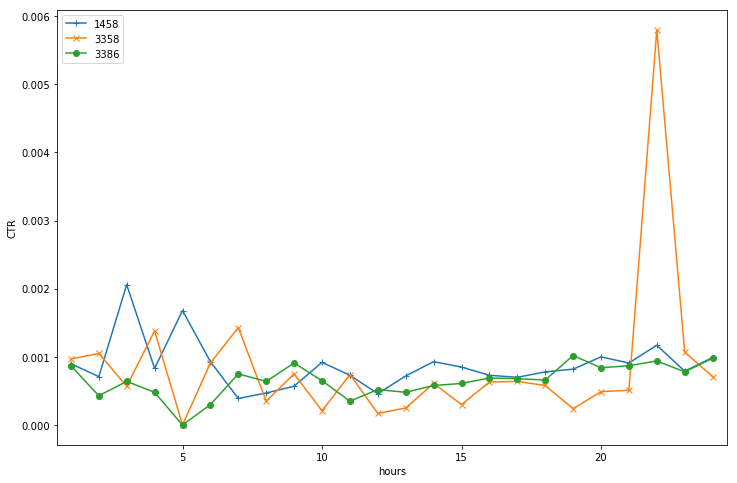

In [14]:
# Line plot of average CTR for advertiser 1458 & 3358 & 3386 via 'hour'

f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='x', label='3358')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3386.values,marker='o', label='3386')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [15]:
# Using 'region' to analyze the average CTR of each advertiser
# Giving three examples: advertiser_1458, advertiser_3358, advertiser_3386

region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(data_train.region.unique())

impression_1458 = data_train.groupby('region').advertiser.value_counts()
region_CTR['impression_1458'] = impression_1458.iloc[impression_1458.index.get_level_values('advertiser') == 1458].values 

impression_3358 = data_train.groupby('region').advertiser.value_counts()
region_CTR['impression_3358'] = impression_3358.iloc[impression_3358.index.get_level_values('advertiser') == 3358].values 

impression_3386 = data_train.groupby('region').advertiser.value_counts()
region_CTR['impression_3386'] = impression_3386.iloc[impression_3386.index.get_level_values('advertiser') == 3386].values 

click = data_train.groupby(['advertiser','region']).click.value_counts()

clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['click_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['click_3358'] = clickall_3358.groupby(level='region').sum().values

clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
clickall_3386.iloc[clickall_3386.index.get_level_values('click') == 0]=0
region_CTR['click_3386'] = clickall_3386.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.click_1458 / region_CTR.impression_1458)).round(5)
region_CTR['CTR_3358'] = ((region_CTR.click_3358 / region_CTR.impression_3358)).round(5)
region_CTR['CTR_3386'] = ((region_CTR.click_3386 / region_CTR.impression_3386)).round(5)

In [16]:
region_CTR

,region,impression_1458,impression_3358,impression_3386,click_1458,click_3358,click_3386,CTR_1458,CTR_3358,CTR_3386
0,0,7844,6162,9847,9,13,15,0.00115,0.00211,0.00152
1,1,23389,12157,23353,17,6,16,0.00073,0.00049,0.00069
2,2,8875,4820,7815,3,2,4,0.00034,0.00041,0.00051
3,3,27398,13246,24805,20,15,15,0.00073,0.00113,0.00060
4,15,16674,7968,14344,18,7,10,0.00108,0.00088,0.00070
5,27,7616,3754,6978,5,3,8,0.00066,0.00080,0.00115
6,40,20449,8965,17251,9,6,13,0.00044,0.00067,0.00075
7,55,12091,4823,10568,11,2,5,0.00091,0.00041,0.00047
8,65,12566,5684,10759,11,5,8,0.00088,0.00088,0.00074
9,79,14300,9523,12859,17,9,11,0.00119,0.00095,0.00086


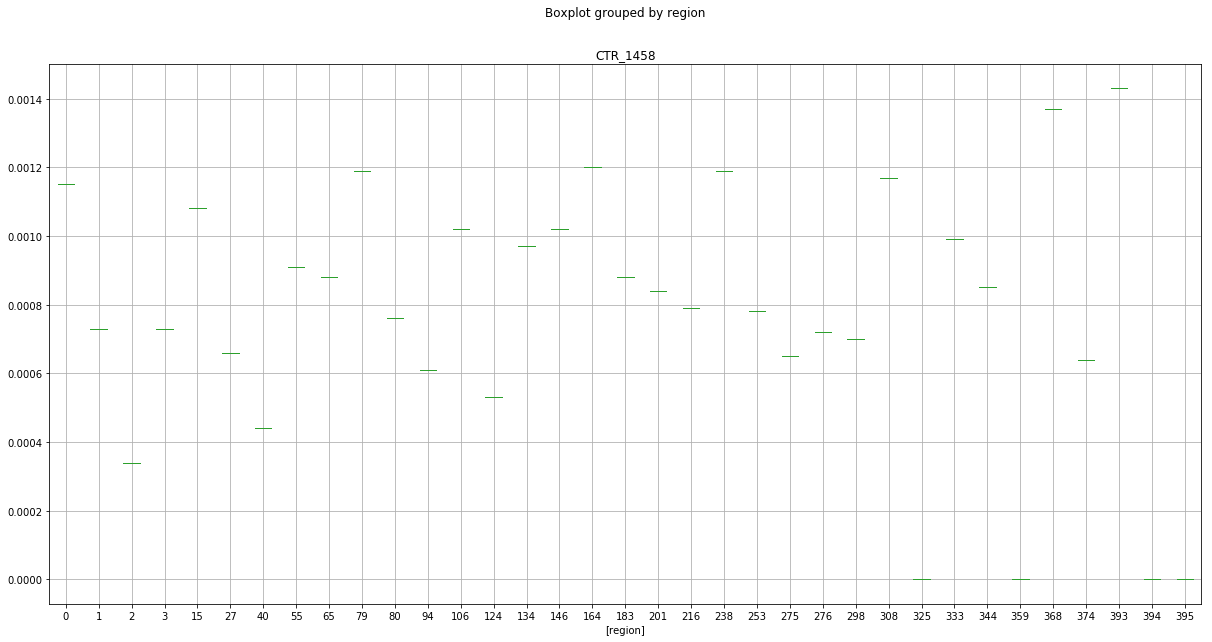

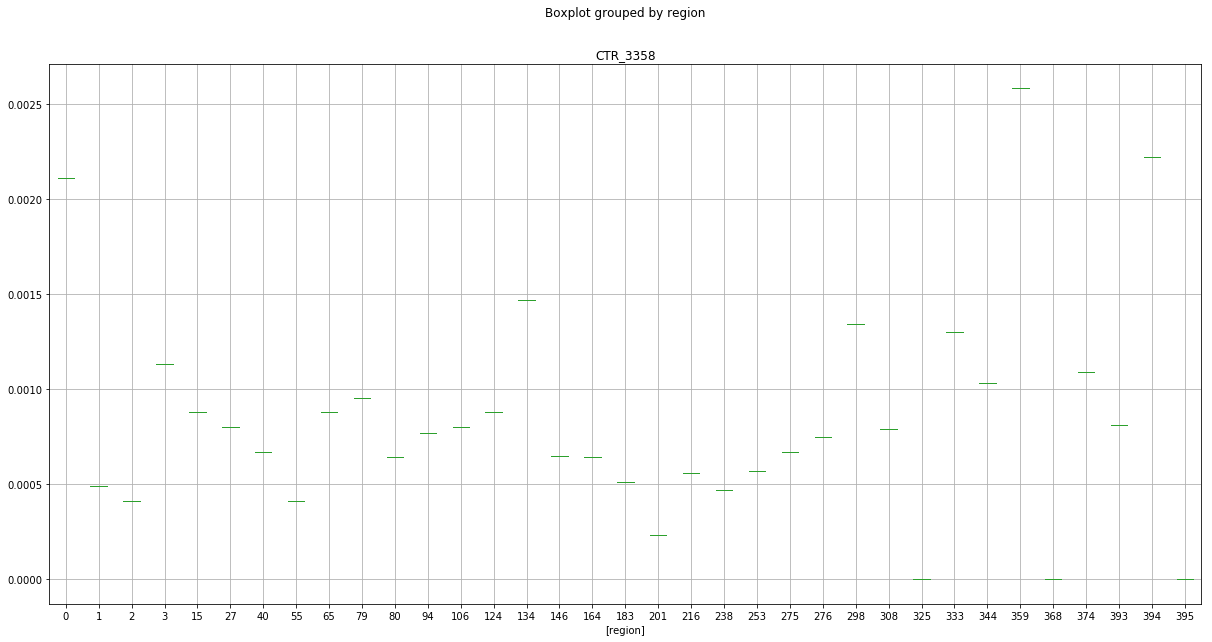

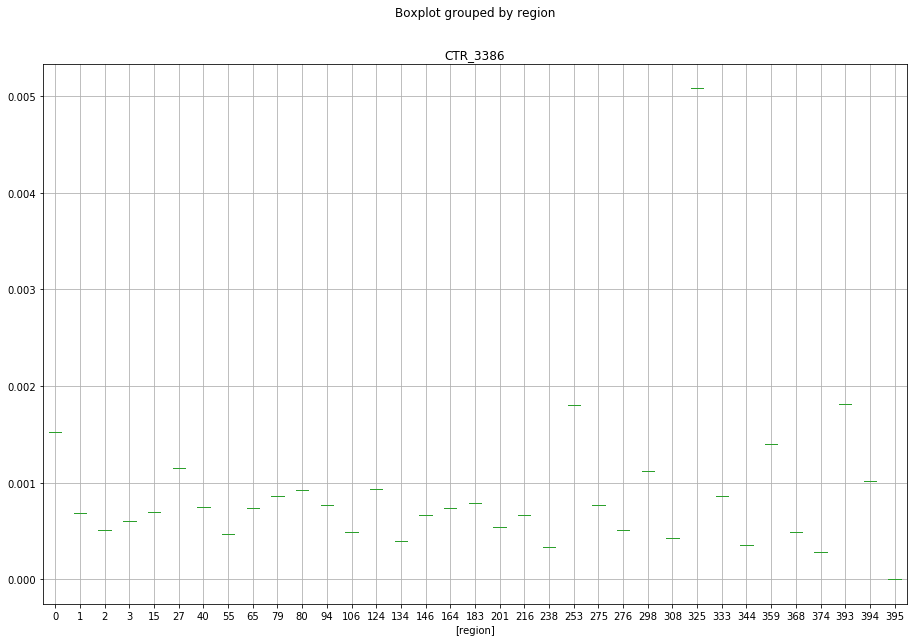

In [17]:
# Boxplot of average CTR for advertiser 1458 & 3358 & 3386 via 'region'

a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(20,10))
a2 = region_CTR[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(20,10))
a3 = region_CTR[['region','CTR_3386']]
a3.boxplot(by='region',figsize=(15,10))

In [18]:
# Using 'adexchange' to analyze the average CTR of each advertiser
# Giving three examples: advertiser_1458, advertiser_3358, advertiser_3386

adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(data_train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])

impression_1458 = data_train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['impression_1458'] = impression_1458.iloc[impression_1458.index.get_level_values('advertiser') == 1458].values 

impression_3358 = data_train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['impression_3358'] = impression_3358.iloc[impression_3358.index.get_level_values('advertiser') == 3358].values 

impression_3386 = data_train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['impression_3386'] = impression_1458.iloc[impression_3386.index.get_level_values('advertiser') == 3386].values

click = data_train.groupby(['advertiser','adexchange']).click.value_counts()

clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['click_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['click_3358'] = clickall_3358.groupby(level='adexchange').sum().values

clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
clickall_3386.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['click_3386'] = clickall_3386.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.click_1458 / adexchange_CTR.impression_1458)).round(5)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.click_3358 / adexchange_CTR.impression_3358)).round(5)
adexchange_CTR['CTR_3386'] = ((adexchange_CTR.click_3386 / adexchange_CTR.impression_3386)).round(5)

In [19]:
adexchange_CTR

,ad_exchange,impression_1458,impression_3358,impression_3386,click_1458,click_3358,click_3386,CTR_1458,CTR_3358,CTR_3386
0,1,182219,159379,117569,146,146,150,0.00080,0.00092,0.00128
1,2,160460,93691,164620,126,48,92,0.00079,0.00051,0.00056
2,3,197614,51712,216365,179,39,116,0.00091,0.00075,0.00054


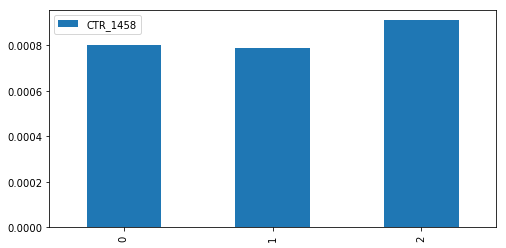

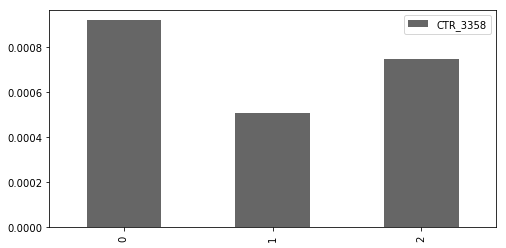

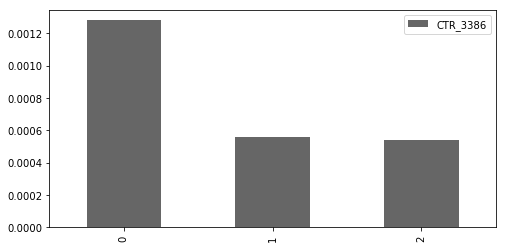

In [20]:
# Boxplot of average CTR for advertiser 1458 & 3358 & 3386 via 'adexchange'
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.plot(by='ad_exchange',kind='bar',figsize=(8,4))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
a2.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(8,4))
a3 = adexchange_CTR[['ad_exchange','CTR_3386']]
a3.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(8,4))